# Assignment 3
write your names here

In [1]:
import numpy as np

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1) # 均值
    X_c=X-np.expand_dims(mu,axis=1) #中心化数据
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False) # 简化奇异值分解 Uk，Vk
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:] # 训练数据降维后的结果
    return S

In [3]:
# Insert Code for Subtask 1.1 here
import imageio
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [4]:
data_train_fold='mnist'
num_amount = len(os.listdir(data_train_fold))                              #数字的数量: 10
num_fold_name=['d%d' % i for i in range(0, num_amount)]#各个数字样本集的名称'd0' 'd1'....
n_take=100                                                                #每个数字中取100个样本
sample_amount=0                                                           #所有数字样本的数量总和 60000
valid_sample_amount=10*n_take                                                #所使用的样本数量
seperate_point=np.zeros(11)                                               #区分不同数字样本的列数：5923，6742.....
seperate_point[0]=0
for i, dp in enumerate(num_fold_name):
    single_num_samples = os.listdir(data_train_fold + '/' + dp)           #单个数字样本的文件名集合 'd0_0001.png',......
    sample_amount=sample_amount+len(single_num_samples)                   #叠加每个数字样本的数量求取所有样本数量和 5923+6742.....

X=np.zeros((28*28,10*n_take))                                                  #样本矩阵，每列为一个样本向量

count=0;                                                                  #样本计数变量
for i, dp in enumerate(num_fold_name):
    single_num_samples = os.listdir(data_train_fold + '/' + dp)           #单个数字样本的文件名集合 'd0_0001.png',......
    for j,sp in enumerate(single_num_samples[0:n_take]):
        X[:,count]=np.ravel(imageio.imread(data_train_fold + '/' + dp+ '/' + sp))                #将样本向量写入矩阵中
        count=count+1
    seperate_point[i+1]=count
k=2    
colors = cm.rainbow(np.linspace(0, 1, 10))

In [5]:
SX=linear_pca(X, k)
# plt.scatter(SX[0,0:int(seperate_point[1])],SX[1,0:int(seperate_point[1])])
#plt.scatter(SX[0,int(seperate_point[1])+1:int(seperate_point[2])],SX[1,int(seperate_point[1])+1:int(seperate_point[2])])

In [6]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    H=np.eye(valid_sample_amount)-1/valid_sample_amount*np.dot(np.ones((valid_sample_amount,1)),np.ones((1,valid_sample_amount)))
    K_ceneter=np.dot(np.dot(H,K),H)
    [U,Sigma,VT]=np.linalg.svd(K_ceneter,full_matrices=False)
    Sigma=Sigma**(0.5)
    S=np.expand_dims(Sigma[:k],axis=1)*(VT[:k,:]) # 训练数据降维后的结果
    S[1,:]=-S[1,:]
    return S

In [7]:
# Insert Code for Subtask 1.3 here
K=np.dot(X.T,X)
SK=gram_pca(K, k)
#plt.scatter(SK[0,int(seperate_point[1])+1:int(seperate_point[2])],SK[1,int(seperate_point[1])+1:int(seperate_point[2])])

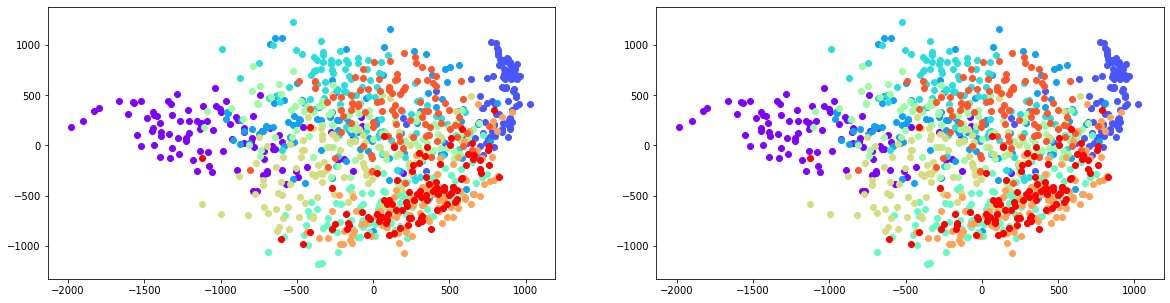

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5)) 
for numbervalue in np.arange(0,10):
    axs[0].scatter(SX[0,int(seperate_point[numbervalue]):int(seperate_point[numbervalue+1])-1],SX[1,int(seperate_point[numbervalue]):int(seperate_point[numbervalue+1])-1],color=colors[numbervalue])
for numbervalue in np.arange(0,10):
    axs[1].scatter(SK[0,int(seperate_point[numbervalue]):int(seperate_point[numbervalue+1])-1],SK[1,int(seperate_point[numbervalue]):int(seperate_point[numbervalue+1])-1],color=colors[numbervalue])

In [9]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    K=np.zeros((X.shape[1],X.shape[1]))
    for i in np.arange(X.shape[1]):
        for j in np.arange(X.shape[1]):
            K[i,j]=math.exp(-np.linalg.norm(X[:,i]-X[:,j])**2/(2*sigma**2))
    return K

In [10]:
def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

In [11]:
#Insert Code for Subtask 1.5 here
sigma=1000
S_kernel=gaussian_kernel_pca(X, k, sigma)

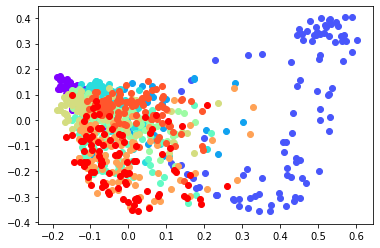

In [12]:
for numbervalue in np.arange(0,10):
    plt.scatter(S_kernel[0,int(seperate_point[numbervalue]):int(seperate_point[numbervalue+1])-1],S_kernel[1,int(seperate_point[numbervalue]):int(seperate_point[numbervalue+1])-1],color=colors[numbervalue])

In [ ]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    n_Samples = X.shape[1]
    K = np.zeros((n_Samples,n_Samples))
    
    sq_dists = pdist(X.T, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-mat_sq_dists/(2*(sigma**2)))
    
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S